In [ ]:
!git clone https://github.com/Delta2711/CS435-Term-Project-Data.git

fatal: destination path 'CS435-Term-Project-Data' already exists and is not an empty directory.


In [ ]:
!pip install pyspark

In [ ]:
import os

import seaborn as sns
import matplotlib.pyplot as plt

from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col

import pandas as pd

from pyspark.mllib.evaluation import MulticlassMetrics

import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score


In [ ]:
spark =  spark = spark = SparkSession.builder.appName('Analysis').getOrCreate()

In [ ]:
spark

In [ ]:
lr_df = spark.read.csv("CS435-Term-Project-Data/logistic_regression_results", header=True, inferSchema=True)

In [ ]:
dummy_df = spark.read.csv("CS435-Term-Project-Data/dummy_results", header=True, inferSchema=True)

In [ ]:
lr_df.show(10)

+-------------+-----+----------+
|     app_name|label|prediction|
+-------------+-----+----------+
|         20XX|    1|       1.0|
|         20XX|    1|       1.0|
|         20XX|    1|       1.0|
|         20XX|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
+-------------+-----+----------+
only showing top 10 rows



In [ ]:
rf_df.show(10)

+-------------+-----+----------+
|     app_name|label|prediction|
+-------------+-----+----------+
|         20XX|    1|       1.0|
|         20XX|    0|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
|A Hat in Time|    1|       1.0|
+-------------+-----+----------+
only showing top 10 rows



In [ ]:
lr_df.count()

276850

In [ ]:
rf_df.count()

276645

In [ ]:
df_labels = ["not recommended", "recommended"]

In [ ]:
preds_and_labels = lr_df.select(['prediction','label']) \
                              .withColumn('label', col('label') \
                              .cast(FloatType())) \
                              .orderBy('prediction')

In [ ]:
preds_and_labels.show(10)

+----------+-----+
|prediction|label|
+----------+-----+
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  1.0|
|       0.0|  0.0|
|       0.0|  0.0|
|       0.0|  1.0|
|       0.0|  0.0|
|       0.0|  0.0|
+----------+-----+
only showing top 10 rows



In [ ]:
pred_label_df  = preds_and_labels.toPandas()

In [ ]:
cm = confusion_matrix(pred_label_df['label'],pred_label_df['prediction'])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_labels)

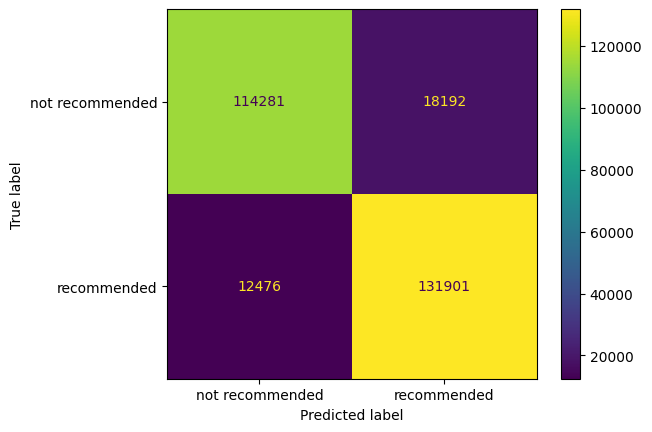

In [ ]:
disp.plot()

In [ ]:
print (classification_report(pred_label_df['label'], pred_label_df['prediction']))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88    132473
         1.0       0.88      0.91      0.90    144377

    accuracy                           0.89    276850
   macro avg       0.89      0.89      0.89    276850
weighted avg       0.89      0.89      0.89    276850



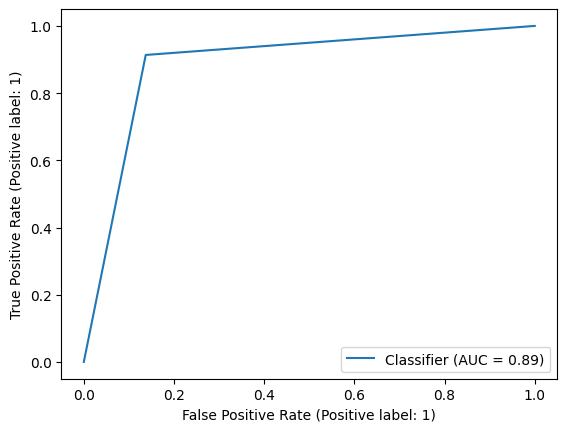

In [ ]:
RocCurveDisplay.from_predictions(pred_label_df['label'], pred_label_df['prediction'])

In [ ]:
roc_auc_score(pred_label_df['label'], pred_label_df['prediction'])

0.8881306238030107

In [ ]:
preds_and_labels = rf_df.select(['prediction','label']) \
                              .withColumn('label', col('label') \
                              .cast(FloatType())) \
                              .orderBy('prediction')

In [ ]:
pred_label_df  = preds_and_labels.toPandas()

In [ ]:
cm = confusion_matrix(pred_label_df['label'],pred_label_df['prediction'])

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=df_labels)

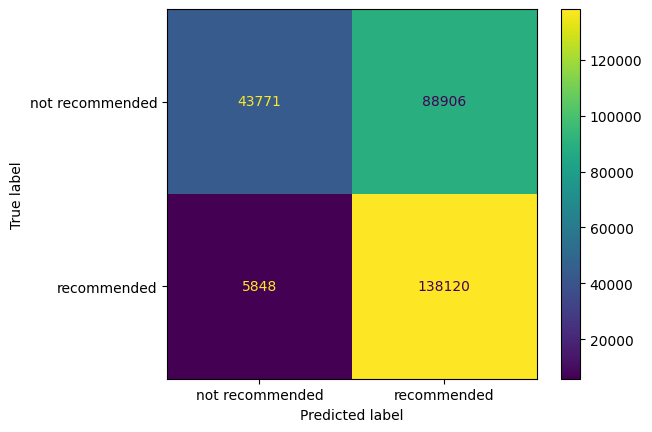

In [ ]:
disp.plot()

In [ ]:
print (classification_report(pred_label_df['label'], pred_label_df['prediction']))

              precision    recall  f1-score   support

         0.0       0.88      0.33      0.48    132677
         1.0       0.61      0.96      0.74    143968

    accuracy                           0.66    276645
   macro avg       0.75      0.64      0.61    276645
weighted avg       0.74      0.66      0.62    276645



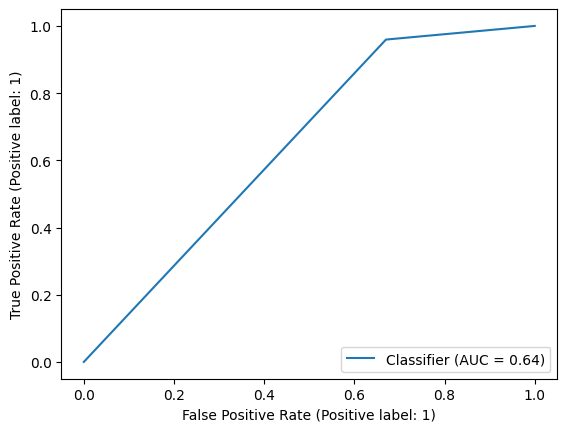

In [ ]:
RocCurveDisplay.from_predictions(pred_label_df['label'], pred_label_df['prediction'])

In [ ]:
roc_auc_score(pred_label_df['label'], pred_label_df['prediction'])

0.6446431633817264

In [ ]:
spark.stop()